![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.stem.snowball import SnowballStemmer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

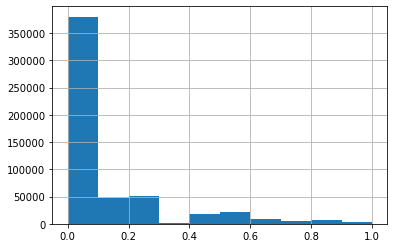

In [5]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [7]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [8]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [9]:
# Celda 1
# Creación de matrices de documentos usando CountVectorizer a partir de X_train
vect_A = CountVectorizer(dtype=np.int8,max_df =0.7,stop_words='english',max_features =10000)
X_dtm_A = vect_A.fit_transform(X_train)
#temp_A=X_dtm_A.todense()

In [10]:
vect_A.vocabulary_

{'oral': 6315,
 'history': 4335,
 'say': 7951,
 'nazis': 6019,
 '1930': 41,
 'did': 2638,
 'native': 6009,
 'children': 1615,
 'knowledge': 5119,
 'government': 4026,
 'yup': 9989,
 'happened': 4188,
 'didn': 2639,
 'marijuana': 5583,
 'harmful': 4207,
 'human': 4451,
 'health': 4250,
 'cigarettes': 1651,
 'widely': 9817,
 'used': 9521,
 'ban': 901,
 'reduces': 7423,
 'stress': 8682,
 'aggression': 425,
 'level': 5294,
 'leading': 5225,
 'crime': 2238,
 'medical': 5670,
 'value': 9553,
 'favorable': 3536,
 'effects': 3055,
 'proven': 7138,
 'author': 825,
 'consideration': 2002,
 'use': 9520,
 'legalized': 5262,
 'market': 5588,
 'transparent': 9260,
 'surely': 8832,
 'better': 1039,
 'illegal': 4529,
 'sales': 7906,
 'drug': 2950,
 'cases': 1455,
 'young': 9982,
 'adult': 370,
 'drugs': 2951,
 'need': 6035,
 'cause': 1481,
 'problems': 7019,
 'bigger': 1056,
 'widespread': 9819,
 'look': 5423,
 'women': 9887,
 'photos': 6669,
 'white': 9808,
 'like': 5338,
 'stood': 8654,
 'south': 84

In [11]:
X_dtm_A

<362779x10000 sparse matrix of type '<class 'numpy.int8'>'
	with 7045228 stored elements in Compressed Sparse Row format>

In [12]:
X_dtm_A.shape

(362779, 10000)

In [13]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_A.get_feature_names())

['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100k', '101', '103', '10k', '10th', '11', '110', '11th', '12', '120', '1200', '125', '13', '130', '14', '140', '14th', '15', '150', '1500', '16', '160', '16th', '17', '18', '180', '19', '1930', '1930s', '1950', '1950s', '1960', '1960s', '1964', '1967', '1968', '1970', '1970s', '1971', '1980', '1980s', '1982', '1984', '1986', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200k', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2030', '20k', '20th', '21', '21st', '22', '23', '24', '247', '25', '250', '26', '27', '28', '29', '2nd', '30', '300', '3000', '31', '32', '33', '34', '35', '350', '36', '37', '38', '39', '3rd', '40', '400', '4000', '41', '42', '43', '44', '45', '450', '46', '47', '48', '49', '4th'

In [14]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=123)
pd.Series(cross_val_score(treereg, X_dtm_A, y_train, cv=10)).describe()

count    10.000000
mean      0.196506
std       0.009524
min       0.181181
25%       0.188354
50%       0.198449
75%       0.204248
max       0.209800
dtype: float64

In [15]:
treereg.fit(X_dtm_A, y_train)
prediccion_treereg_prob=treereg.predict(vect_A.transform(X_test))
MSE_CntVtrzr_DTR=metrics.mean_squared_error(y_test, prediccion_treereg_prob)
MSE_CntVtrzr_DTR

0.031213462454116214

In [17]:
randomfreg = RandomForestRegressor(max_depth=2, random_state=123)


In [18]:
pd.Series(cross_val_score(randomfreg, X_dtm_A, y_train, cv=5)).describe()

count    5.000000
mean     0.094493
std      0.004163
min      0.087741
25%      0.094736
50%      0.094962
75%      0.095899
max      0.099127
dtype: float64

In [19]:
randomfreg.fit(X_dtm_A, y_train)
prediccion_randomfreg_prob=randomfreg.predict(vect_A.transform(X_test))
MSE_CntVtrzr_RFR=metrics.mean_squared_error(y_test, prediccion_randomfreg_prob)
MSE_CntVtrzr_RFR

0.03535548634217224

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
# Celda 2
# Creación de matrices de documentos usando CountVectorizer a partir de X y usando n-gramas
# a partir del parámetro 'ngram_range=(3, 3)' 
vect_C = CountVectorizer( ngram_range=(3, 3),dtype=np.int8,max_df =0.7,stop_words='english',max_features =10000)
X_dtm_C = vect_C.fit_transform(X_train)
#temp_A=X_dtm_C.todense()

In [21]:
vect_C.vocabulary_

{'years ago did': 9867,
 'don pay taxes': 2426,
 'white monopoly capital': 9476,
 'pass smell test': 6361,
 'chemical weapons use': 1263,
 'went broke underestimating': 9433,
 'just come say': 4421,
 '2017 06 23': 218,
 'citizen united states': 1320,
 'good people bad': 3332,
 'lowest common denominator': 5288,
 'laugh way bank': 4742,
 'https cruxnow com': 4034,
 'com commentary 2017': 1521,
 'commentary 2017 03': 1610,
 'trump isn going': 8882,
 'affordable care act': 485,
 'years ago obama': 9887,
 'throw away key': 8699,
 'world class cities': 9625,
 'civil rights act': 1344,
 'rights act 1964': 7530,
 'just didn want': 4429,
 'http www factcheck': 3962,
 'www factcheck org': 9725,
 'going make difference': 3269,
 'moving right direction': 5783,
 'democratically elected president': 1952,
 'quid pro quo': 7132,
 'just want say': 4560,
 'kkk neo nazis': 4627,
 'neo nazis white': 5953,
 'white supremacist groups': 9484,
 'united states america': 9021,
 'hook line sinker': 3852,
 'tryi

In [22]:
X_dtm_C.shape

(362779, 10000)

In [23]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_C.get_feature_names())

['000 00 year', '000 000 00', '000 000 000', '000 000 billion', '000 000 million', '000 000 people', '000 000 tax', '000 000 votes', '000 000 year', '000 10 000', '000 100 000', '000 12 000', '000 20 000', '000 200 000', '000 250 000', '000 30 000', '000 300 000', '000 50 000', '000 500 000', '000 barrels day', '000 daca recipients', '000 emails missing', '000 far year', '000 immigrants year', '000 jobs created', '000 new jobs', '000 people killed', '000 people work', '000 people year', '000 sq ft', '000 square foot', '000 syrian refugees', '000 tax free', '000 time jobs', '000 year just', '000 year pay', '000 years ago', '000 years old', '02 05 energy', '06 23 opinion', '10 000 00', '10 000 000', '10 000 20', '10 000 jobs', '10 000 people', '10 000 times', '10 000 year', '10 000 years', '10 15 years', '10 20 30', '10 20 years', '10 500 000', '10 billion deficit', '10 billion deficits', '10 billion dollar', '10 billion dollars', '10 billion plus', '10 billion rail', '10 billion year', 

In [24]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=123)
pd.Series(cross_val_score(treereg, X_dtm_C, y_train, cv=10)).describe()

count    10.000000
mean      0.003685
std       0.001203
min       0.001973
25%       0.003187
50%       0.003611
75%       0.004095
max       0.005593
dtype: float64

In [25]:
treereg.fit(X_dtm_C, y_train)
prediccion_treereg_prob=treereg.predict(vect_C.transform(X_test))
MSE_CntVtrzr_3G_DTR=metrics.mean_squared_error(y_test, prediccion_treereg_prob)
MSE_CntVtrzr_3G_DTR

0.03886071406806415

In [26]:
randomfreg = RandomForestRegressor(max_depth=10, random_state=123)
pd.Series(cross_val_score(randomfreg, X_dtm_C, y_train, cv=10)).describe()

count    10.000000
mean      0.004358
std       0.000949
min       0.002599
25%       0.004127
50%       0.004274
75%       0.004628
max       0.005799
dtype: float64

In [27]:
randomfreg.fit(X_dtm_C, y_train)
prediccion_randomfreg_prob=randomfreg.predict(vect_C.transform(X_test))
MSE_CntVtrzr_3G_RFR=metrics.mean_squared_error(y_test, prediccion_randomfreg_prob)

In [28]:
MSE_CntVtrzr_3G_RFR

0.0388378177877354

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

### En qué consisten las técnicas de tokenización CountVectorizer y el TfidfVectorizer

TfidfVectorizer y CountVectorizer son métodos para convertir datos de texto en vectores, ya que el modelo solo puede procesar datos numéricos.

### Qué significa Tfidf

Primero entendamos qué es el Tfidf. Para explicarlo lo mejor posible, separaré este término en dos partes:

TF – Term Frequency (Frecuencia de Término) – mide la frecuencia con la que se utiliza un término específico en un único documento. Claramente, cuanto más extenso sea el documento, más probable será que el término aparezca más veces. Por lo tanto es un valor que depende del número de palabras que contiene un documento. Este análisis ayuda a determinar si tu palabra clave aparece de forma natural o forzada en el documento analizado.

$TF = Número de veces que aparece la palabra / Número total de palabras en el documento$

IDF: Inverse Document Frequency (Frecuencia Inversa de Documento) – mide la importancia que tiene un término específico con respecto a la relevancia que tiene el texto en todo el sitio web. Sin embargo, aquellos términos que son muy comunes en un texto pero que no tienen mucha relevancia (E.g “es”, “de”, “el”, etc.) se excluyen del análisis:

$IDF = Número de documentos / Número de términos en un documento$

Entonces el TfidfVectorizer convierte una colección de documentos sin procesar en una matriz de características de TF-IDF.

### Para qué se usan el CountVectorizer y el TfidfVectorizer

En otras paralabras, en CountVectorizer solo se cuenta el número de veces que aparece una palabra en el documento, lo que da como resultado un sesgo a favor de las palabras más frecuentes. Esto termina ignorando palabras raras que podrían haber ayudado a procesar nuestros datos de manera más eficiente. Para superar esto, se usa TfidfVectorizer. En TfidfVectorizer se considera el peso total del documento de una palabra. Esto ayuda a lidiar con las palabras más frecuentes. Usándolo se puede hacer una  penalización. TfidfVectorizer pondera el número de palabras según la frecuencia con la que aparecen en los documentos.

### Ventajas comparativas

El TfidVectorizer se diferencia de CountVectorizer en que éste pondera aquellas palabras que aparecen mucho en un documento pero no en muchos documentos.

Poniendo de la misma forma que CountVectorizer todas las palabras en un vector siendo cada uno, una columna o propiedad y teniendo un valor de ponderación.

Esto permite que una palabra como "doctor" que aparece en todos los documentos médicos no sea tan tenida en cuenta en el caso e TFidVectorizer ya que se supone que la mayor parte de los documentos médicos tendrán la palabra doctor y esta no tiene ninguna implicancia en la clasificación de documentos médicos.

Hay que tener en cuenta que en muchos casos y acorde al algoritmo utilizado, puede llegar a comportarse mejor con CountVectorizer o con TfidVectorizer, es posible que de un mejor resultado con CountVectorizer.

### Referencias

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

https://es.ryte.com/magazine/nuestra-innovadora-funcion-tfidf

https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YmxB9u1BxD8

https://medium.com/@sergiodana/tfidvectorizer-versus-countvectorizer-diferencias-10202f0e4fe0

https://www.quora.com/What-is-the-difference-between-TfidfVectorizer-and-CountVectorizer-1

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [29]:
# Celda 4
vect_D = TfidfVectorizer (dtype=np.int8,max_df =0.7,stop_words='english',max_features =10000)
X_dtm_D = vect_D.fit_transform(X_train)
#temp_D=X_dtm_D.todense()

In [30]:
vect_D.vocabulary_

{'oral': 6315,
 'history': 4335,
 'say': 7951,
 'nazis': 6019,
 '1930': 41,
 'did': 2638,
 'native': 6009,
 'children': 1615,
 'knowledge': 5119,
 'government': 4026,
 'yup': 9989,
 'happened': 4188,
 'didn': 2639,
 'marijuana': 5583,
 'harmful': 4207,
 'human': 4451,
 'health': 4250,
 'cigarettes': 1651,
 'widely': 9817,
 'used': 9521,
 'ban': 901,
 'reduces': 7423,
 'stress': 8682,
 'aggression': 425,
 'level': 5294,
 'leading': 5225,
 'crime': 2238,
 'medical': 5670,
 'value': 9553,
 'favorable': 3536,
 'effects': 3055,
 'proven': 7138,
 'author': 825,
 'consideration': 2002,
 'use': 9520,
 'legalized': 5262,
 'market': 5588,
 'transparent': 9260,
 'surely': 8832,
 'better': 1039,
 'illegal': 4529,
 'sales': 7906,
 'drug': 2950,
 'cases': 1455,
 'young': 9982,
 'adult': 370,
 'drugs': 2951,
 'need': 6035,
 'cause': 1481,
 'problems': 7019,
 'bigger': 1056,
 'widespread': 9819,
 'look': 5423,
 'women': 9887,
 'photos': 6669,
 'white': 9808,
 'like': 5338,
 'stood': 8654,
 'south': 84

In [31]:
X_dtm_D.shape

(362779, 10000)

In [32]:
# Visualización de 50 términos en el diccionario de palabras
print(vect_D.get_feature_names())

['00', '000', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '100k', '101', '103', '10k', '10th', '11', '110', '11th', '12', '120', '1200', '125', '13', '130', '14', '140', '14th', '15', '150', '1500', '16', '160', '16th', '17', '18', '180', '19', '1930', '1930s', '1950', '1950s', '1960', '1960s', '1964', '1967', '1968', '1970', '1970s', '1971', '1980', '1980s', '1982', '1984', '1986', '1989', '1990', '1990s', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '200k', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2030', '20k', '20th', '21', '21st', '22', '23', '24', '247', '25', '250', '26', '27', '28', '29', '2nd', '30', '300', '3000', '31', '32', '33', '34', '35', '350', '36', '37', '38', '39', '3rd', '40', '400', '4000', '41', '42', '43', '44', '45', '450', '46', '47', '48', '49', '4th'

In [33]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=123)
pd.Series(cross_val_score(treereg, X_dtm_D, y_train, cv=10)).describe()

count    10.000000
mean      0.203586
std       0.008498
min       0.190379
25%       0.196234
50%       0.205861
75%       0.210874
max       0.213279
dtype: float64

In [34]:
treereg.fit(X_dtm_D, y_train)
prediccion_treereg_prob=treereg.predict(vect_D.transform(X_test))
MSE_TfidfVtrzr_DTR=metrics.mean_squared_error(y_test, prediccion_treereg_prob)
MSE_TfidfVtrzr_DTR

0.030926085356254553

In [38]:
randomfreg = RandomForestRegressor(max_depth=2, random_state=123)
#pd.Series(cross_val_score(randomfreg, X_dtm_D, y_train, cv=10)).describe()

In [39]:

randomfreg.fit(X_dtm_D, y_train)
prediccion_randomfreg_prob=randomfreg.predict(vect_D.transform(X_test))
MSE_TfidfVtrzr_RFR=metrics.mean_squared_error(y_test, prediccion_randomfreg_prob)
MSE_TfidfVtrzr_RFR

0.0352335511614535

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

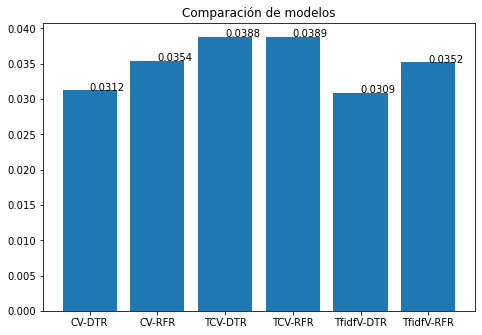

In [40]:
# Celda 5
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['CV-DTR', 'CV-RFR','TCV-DTR', 'TCV-RFR','TfidfV-DTR', 'TfidfV-RFR']
ejeY = [MSE_CntVtrzr_DTR,MSE_CntVtrzr_RFR,MSE_CntVtrzr_3G_RFR,MSE_CntVtrzr_3G_DTR,MSE_TfidfVtrzr_DTR,MSE_TfidfVtrzr_RFR]

ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,round(y[i],4),round(y[i], 4))
addlabels(ejeX,ejeY,plt)
plt.show()

Para este taller se usaron los modelos de Arboles de Decisión de Regresión (DTR) y Random Forest Regresor (RFR). 

Dados los parámetros con que se calacularon en cuanto a DTR el CountVectorizer (CV) y el TfidfVectorizer (TfidfV) parecieran tener resultados similares, pues su MSE es de 0.031 y 0.030 respectivamente, y mejores al del CountVectorizer con trigramas (TCV), el cual tiene un MSE de 0.038.

En cuanto al modelo RFR usando el CountVectorizer y el TfidfVectorizer, parecieran tener resultados similares igualmente, pues su MSE es de 0.0354 y 0.0352 respectivamente, los cuales tienen un desempeño mejor que on el CountVectorizer con trigramas, el cual tiene un MSE de 0.0388. En general, los modelos con trigramas se desempeñaron peor para este ejemplo.

Por tanto, si lo que se busca es realizar validaciones en muchos documentos relacionados y donde no se quiere dar tanto peso a las palabras comunes, se recomendaria usar TfidfVectorizer con Arboles de Decisión de Regresión. Si no se busca realizar busquedas en multiples documentos o si se quiere dar peso equivalente en ocurrencias a las palabras, se recomendaría usar CountVectorizer con Arboles de Decisión de Regresión dado que fueron los modelos que presentaron mejores resultados.